## Introductory Machine Learning: Assignment 4

**Deadline:**

Assignment 4 is due Tuesday, November 2 at 11:59pm. Late work will not be accepted as per the course policies (see the Syllabus and Course policies on [Canvas](https://canvas.yale.edu).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on [Canvas](https://canvas.yale.edu).  You can also post questions or start discussions on [Ed Discussion](https://edstem.org/us/courses/9209/discussion/). The problems are broken up into steps that should help you to make steady progress.

**Submission:**

Submit your assignment as a .pdf on Gradescope, and as a .ipynb on Canvas. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:  
1.  Go to "File" at the top-left of your Jupyter Notebook
2.  Under "Download as", select "HTML (.html)"
3.  After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
4.  From the print window, select the option to save as a .pdf

**Topics**
1. Principal components analysis
2. Dimension reduction

In this assignment you'll gain some hands-on experience with principal components analysis (PCA).

The assignment has three problems. The first problem investigates PCA and linear regression on a simple toy data set. The second two problems use the MNIST and Fashion MNIST data, and the database of faces that we began looking at during this week's lectures. In the second problem, you will study how different numbers of principal components represent the images visually. For third problem you will use logistic regression to predict the class label of images using the principal components representation of the images, and examine how the classification error changes with the number of principal components used. 

For the second two problems, once you get your code to work on MNIST, it should be straightforward to just copy/paste the code and then run it on Fashion MNIST and the face data. You may wish to review the notebook `pca-demo.ipynb` discussed in class before beginning these problems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

### Problem 1: Principal components and least squares (20 Points)

In least-squares regression one of the assumptions made is that the explanatory variables are non-random and contain no measurement error. Therefore, the size of the residuals (vertical distances between each observed values of the response variable and the line) completely characterize the loss due to a given line. However, it is often the case that explanatory variables do have some randomness in them, in which case we may wish to characterize the loss with the orthogonal distances between data points and the line. This can be done with what is called Principal Component Regression, which you will use in this problem.

#### Part (a)

The cell below simulates two independent random variables, each from a Normal distribution with mean $0$. It then rotates the data by an angle $\dfrac{\pi}{3}$. What is the slope and intercept of a horizontal line after it has been rotated about the origin by $\dfrac{\pi}{3}$ radians and shifted up by 2 in the y axis? Add a line with this slope and intercept to the plot generated in the following cell.

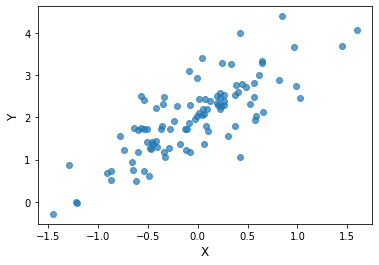

In [2]:
np.random.seed(265)
X = np.vstack((np.random.normal(0, 1, size=100), np.random.normal(0, 0.3, size=100))).T

theta = np.pi/3
R = np.array([np.cos(theta), np.sin(theta), -np.sin(theta), np.cos(theta)]).reshape(2,2)
X = np.dot(X, R)
X[:,1] = X[:,1]+2

plt.scatter(np.array(X[:,0]), np.array(X[:,1]), alpha=.70)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)


#Your Code Here
plt.show()

Slope = 

Intercept = 

#### Part (b)

Use least-squares regression to fit a line (with a slope and intercept) to the data generated above. Create a plot that displays the data, the true line, and the least-squares regression line. Be sure to label the two lines with legends in your plot!

You could use `statsmodels.api.OLS` to fit the "ordinary least-squares" regression, or any other function of your choice.


In [3]:
# Your Code Here

#### Part (c)

Now fit a line to the data by projecting onto the first principal component. What is the slope of the line created by the first principal component, and how does it relate to the true slope? Create a plot with all three lines, including those you constructed in parts (a) and (b). Please label your plots.

Your Markdown Here

In [4]:
# Your Code Here

#### Part (d)

Explain why least-squares regression and principal components analysis give different fits to the data in part (c).
Can you say that one fit is better than the other? Why or why not?

Your Markdown Here

### Problems 2 and 3: MNIST and  Fashion MNIST data


For the next two problems you will use the MNIST and [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist/blob/master/README.md) data. 


### Problem 2: PCA for dimension reduction (20 Points)

In this problem you will approximately reconstruct images by simplifying them to multiples of a few principal components.

Note: When you display the images, use the color map `cmap=plt.cm.gray.reversed()` for MNIST and Fashion MNIST and use `cmap=plt.cm.gray` for the face data

#### Part (a)

Pick a random seed in the next cell to select a random image of a handwritten $0$ from the MNIST data.

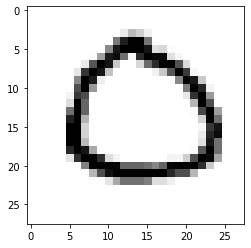

In [5]:
(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x = x.reshape([60000, 28*28])
zeros = np.where(y==0)[0]
x = x[zeros,:]
y = y[zeros]
np.random.seed(265) # put your seed here
my_image = np.random.randint(0, len(y), size=1)

plt.imshow(x[my_image,:].reshape((28,28)), cmap=plt.cm.gray.reversed())

For $k = 0, 10, 20, ...,100$, use $k$ principal components for MNIST $0$'s to approximately reconstruct the image selected above. Display the reconstruction for each value of $k$. To display the set of images compactly, you may want to use subplot, as shown in the starter code for Problem 3(c) below. You may also refer to the examples in this document: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.subplots.html

In [6]:
# Your Code Here

Your Markdown Here

#### Part (b)

Repeat Part (a), but this time for the dresses in the Fashion-MNIST dataset.

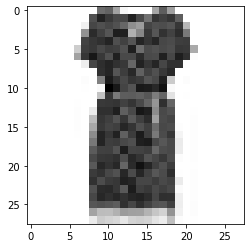

In [7]:
(x, y), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x = x.reshape([60000, 28*28])
zeros = np.where(y==3)[0]
x = x[zeros,:]
y = y[zeros]
np.random.seed(265) #put your seed here
my_image = np.random.randint(0, len(y), size=1)

plt.imshow(x[my_image,:].reshape((28,28)), cmap=plt.cm.gray.reversed())

In [8]:
#Your Code Here

Your Markdown Here

#### Part (c)

Do the same thing as in Parts (a) and (b), this time reconstructing an image of Gerhard Schroeder.

In [9]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

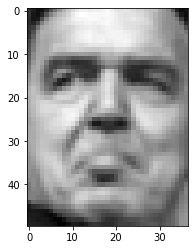

In [10]:
x = lfw_people.data
y = lfw_people.target
zeros = np.where(y==4)[0]
x = x[zeros,:]
y = y[zeros]
np.random.seed(265) #put your seed here
my_image = np.random.randint(0, len(y), size=1)


plt.imshow(x[my_image,:].reshape((50,37)), cmap=plt.cm.gray)#, cmap=plt.cm.gray.reversed())

In [11]:
# Your Code Here

Your Markdown Here

### Problem 3: PCA for classification (20 Points)

#### Part (a)

Load in the MNIST data with the labels as `y` and the images as `x` by running the next cell. Create a subset of the data by keeping only the images that have the label of either $4$ or $9$. Use Principal Components Analysis (PCA) to project the data onto the first two principal components, and create a plot of the projected data color-coded by the label. Does the plot make sense? Explain in a couple sentences.

In [12]:
from sklearn.linear_model import LogisticRegression

(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x = x.reshape([60000, 28*28])

In [13]:
# Your Code Here

Your Markdown Here

#### Part (b)

Why not use more principal components? For $k = 2,3,4,...,15$, use PCA to project the data onto $k$ principal components. For each $k$, use logistic regression to build a model to classify images as $4$ or $9$, and calculate the misclassification rate. Create a plot of misclassification rate as a function of $k$, the number of principal components used. Does the plot make sense? Explain.

In [14]:
# Your Code Here

Your Markdown Here

#### Part (c)

Build a logistic regression model using $10$ principal components. Create a list called `misclass` that lists the indices of all images that were misclassified with this model. Does it make sense that these would be hard to classify correctly?

In [15]:
# Your Code Here, modify the lines below
keep = np.where((y==4) | (y==9))[0]
misclass = np.zeros_like(y[keep]) # list of the indices of images that were misclassified

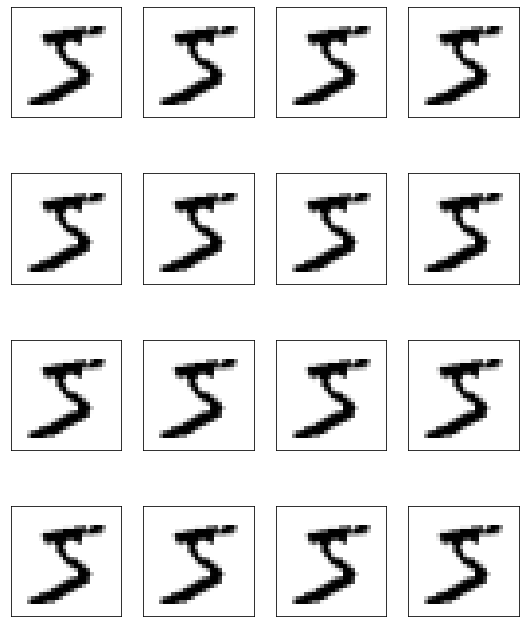

In [16]:
# The following code will display the images that are misclassified
from random import sample 

images = x
mis_samples = sample(list(misclass),16)

plt.figure(figsize=(1.8 * 4, 2.4 * 4))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[mis_samples[i]].reshape((28, 28)), cmap=plt.cm.gray.reversed())
    plt.xticks(())
    plt.yticks(())

Your Markdown Here

#### Part (d)

Now use the Fashion-MNIST data and train logistic regression models to classify coats ($y=4$) and handbags ($y=8$). Again use $k = 2,3,4,...,15$ to project the data onto $k$ principal components, and calculate the misclassification rate at each $k$. Create a plot of misclassification rate vs. $k$.

Does your plot make sense? Briefly interpret it in 2-3 sentences.

In [17]:
(x, y), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
fashion = x.reshape([60000, 28*28])

In [18]:
# Your Code Here